<a href="https://colab.research.google.com/github/abasnezhad/Kaggle/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [47]:
df=pd.read_csv("diabetes.csv")

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


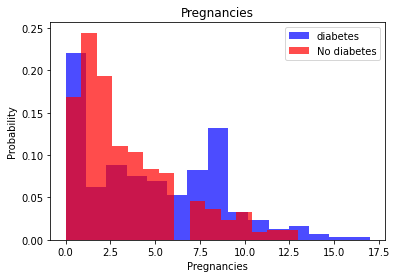

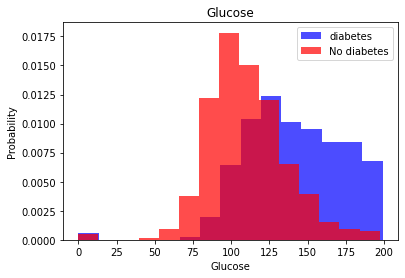

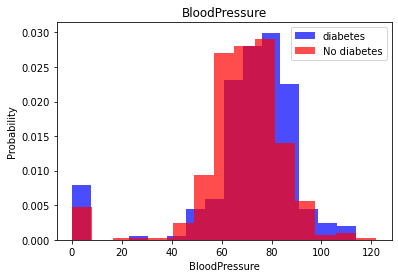

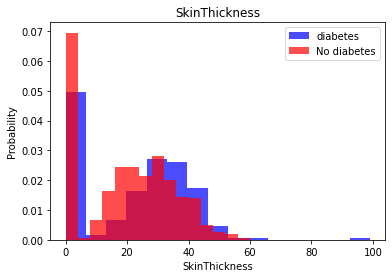

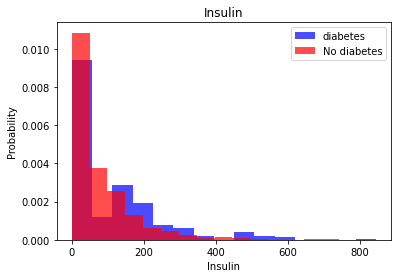

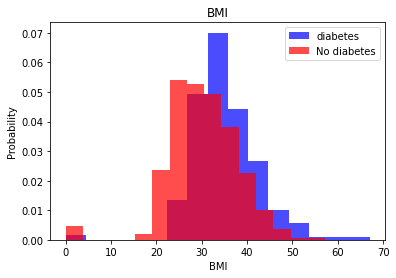

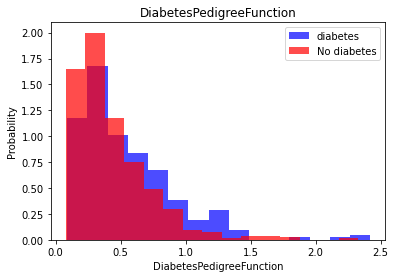

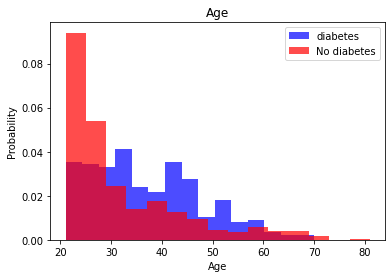

In [49]:
#histogram of each column 

for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label="diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [50]:
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values 
# these are  numpy array

In [51]:
#scaling
scaler= StandardScaler()
x= scaler.fit_transform(x)

# you do not need these two for the model, just for visualiation or doing pnda things 
data= np.hstack((x, np.reshape(y, (-1,1)))) 
transfored_df= pd.DataFrame(data, columns=df.columns)

In [52]:
# putting the outputs on the same porortions

over=RandomOverSampler()
x, y = over.fit_resample(x,y)

# you do not need these two for the model, just for visualiation or doing pnda things 
data= np.hstack((x, np.reshape(y, (-1,1))))
transfored_df= pd.DataFrame(data, columns=df.columns)


In [53]:
x_train, x_temp, y_train, y_temp= train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test= train_test_split(x, y, test_size=0.5, random_state=0)

In [54]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(16, activation='relu'),
                            tf.keras.layers.Dense(16, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid'),

                           
])

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [56]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7999 - accuracy: 0.4883


[0.7999014258384705, 0.4883333444595337]

In [57]:
model.evaluate(x_valid, y_valid)

16/16 [==============================] - 0s 1ms/step - loss: 0.7938 - accuracy: 0.4940


[0.7937859296798706, 0.49399998784065247]

In [58]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data= (x_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 2s 14ms/step - loss: 0.7053 - accuracy: 0.5783 - val_loss: 0.6465 - val_accuracy: 0.6540
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.6202 - accuracy: 0.7033 - val_loss: 0.6039 - val_accuracy: 0.7060
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5877 - accuracy: 0.7133 - val_loss: 0.5761 - val_accuracy: 0.7160
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.7317 - val_loss: 0.5522 - val_accuracy: 0.7160
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5421 - accuracy: 0.7350 - val_loss: 0.5350 - val_accuracy: 0.7240
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7317 - val_loss: 0.5219 - val_accuracy: 0.7240
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5166 - accuracy: 0.7400 - val_loss: 0.5133 - val_accuracy: 0.7260
Epoch 8/20
38/38 [=

In [59]:
model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.7780


[0.47272855043411255, 0.777999997138977]